In [19]:
import pandas as pd
import seaborn as sb
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

In [6]:
data=pd.read_csv('basket.csv')

In [7]:
data.isna().sum()

0         0
1         0
2     10080
3     12778
4     14168
5     14512
6     14687
7     14767
8     14912
9     14962
10    14962
dtype: int64

In [8]:
data.describe()

,0,1,2,3,4,5,6,7,8,9,10
count,14963,14963,4883,2185,795,451,276,196,51,1,1
unique,165,165,154,146,126,101,88,72,35,1,1
top,whole milk,whole milk,whole milk,whole milk,whole milk,shopping bags,yogurt,whole milk,shopping bags,curd,newspapers
freq,1083,983,244,111,39,25,19,14,4,1,1


In [9]:
print(data)

                           0                   1                    2       3  \
0                 whole milk              pastry          salty snack     NaN   
1                    sausage          whole milk  semi-finished bread  yogurt   
2                       soda  pickled vegetables                  NaN     NaN   
3                canned beer     misc. beverages                  NaN     NaN   
4                    sausage    hygiene articles                  NaN     NaN   
...                      ...                 ...                  ...     ...   
14958            butter milk  whipped/sour cream                  NaN     NaN   
14959          bottled water               herbs                  NaN     NaN   
14960  fruit/vegetable juice              onions                  NaN     NaN   
14961           bottled beer    other vegetables                  NaN     NaN   
14962                   soda     root vegetables  semi-finished bread     NaN   

         4    5    6    7  

In [10]:
data=data.fillna('')

In [11]:
data

,0,1,2,3,4,5,6,7,8,9,10
0,whole milk,pastry,salty snack,,,,,,,,
1,sausage,whole milk,semi-finished bread,yogurt,,,,,,,
2,soda,pickled vegetables,,,,,,,,,
3,canned beer,misc. beverages,,,,,,,,,
4,sausage,hygiene articles,,,,,,,,,
...,...,...,...,...,...,...,...,...,...,...,...
14958,butter milk,whipped/sour cream,,,,,,,,,
14959,bottled water,herbs,,,,,,,,,
14960,fruit/vegetable juice,onions,,,,,,,,,
14961,bottled beer,other vegetables,,,,,,,,,


In [12]:
data.isna().sum()

0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
dtype: int64

In [13]:
oht=pd.get_dummies(data)

In [14]:
frequent_item_sets=apriori(oht,min_support=0.4,use_colnames=True)

D:\Anaconda\Lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:110: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


<Axes: xlabel='support', ylabel='confidence'>

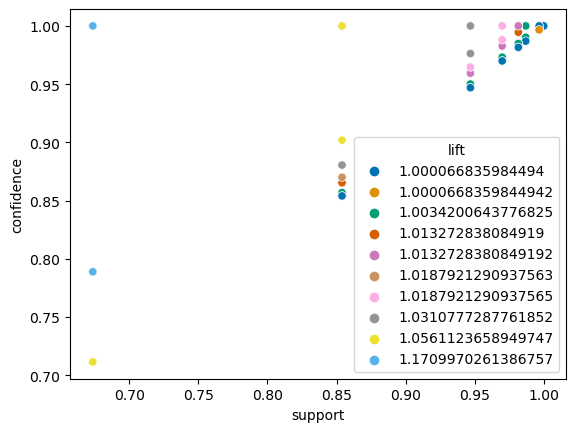

In [21]:
association_rules_data=association_rules(frequent_item_sets,metric='confidence',min_threshold=0.7)
sb.scatterplot(data=association_rules_data,x='support',y='confidence',hue='lift',palette='colorblind')

In [18]:
frequent_item_sets

,support,itemsets
0,0.673662,(2_)
1,0.853973,(3_)
2,0.946869,(4_)
3,0.969859,(5_)
4,0.981555,(6_)
...,...,...
506,0.673662,"(4_, 8_, 9_, 10_, 2_, 3_, 7_, 6_)"
507,0.673662,"(8_, 9_, 5_, 10_, 2_, 3_, 7_, 6_)"
508,0.673662,"(4_, 8_, 9_, 5_, 10_, 2_, 7_, 6_)"
509,0.853973,"(4_, 8_, 9_, 5_, 10_, 3_, 7_, 6_)"


In [22]:
association_rules_data

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(2_),(3_),0.673662,0.853973,0.673662,1.000000,1.170997,0.098373,inf,0.447471
1,(3_),(2_),0.853973,0.673662,0.673662,0.788856,1.170997,0.098373,1.545571,1.000000
2,(2_),(4_),0.673662,0.946869,0.673662,1.000000,1.056112,0.035792,inf,0.162810
3,(4_),(2_),0.946869,0.673662,0.673662,0.711462,1.056112,0.035792,1.131008,1.000000
4,(2_),(5_),0.673662,0.969859,0.673662,1.000000,1.031078,0.020305,inf,0.092361
...,...,...,...,...,...,...,...,...,...,...
15995,"(3_, 7_)","(4_, 8_, 9_, 5_, 10_, 2_, 6_)",0.853973,0.673662,0.673662,0.788856,1.170997,0.098373,1.545571,1.000000
15996,"(6_, 3_)","(4_, 8_, 9_, 5_, 10_, 2_, 7_)",0.853973,0.673662,0.673662,0.788856,1.170997,0.098373,1.545571,1.000000
15997,(4_),"(8_, 9_, 5_, 10_, 2_, 3_, 7_, 6_)",0.946869,0.673662,0.673662,0.711462,1.056112,0.035792,1.131008,1.000000
15998,(2_),"(4_, 8_, 9_, 5_, 10_, 3_, 7_, 6_)",0.673662,0.853973,0.673662,1.000000,1.170997,0.098373,inf,0.447471
